In [1]:
!pip install transformers torch

import os
import json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
# PATHS
train_queries_file = "train_queries.json"
test_queries_file = "test_queries.json"
train_gold_mapping_file = "train_gold_mapping.json"
shuffled_pre_ranking_file = "shuffled_pre_ranking.json"
queries_content_file = "queries_content_with_features.json"
documents_content_file = "documents_content_with_features.json"

test_predictions_file = "prediction2.json"

if not all(os.path.exists(f) for f in [test_queries_file, shuffled_pre_ranking_file, queries_content_file, documents_content_file]):
    print("Error: One or more necessary data files for the test set are missing.")
    exit()
else:
    print("Necessary data files for the test set found.")

Necessary data files for the test set found.


In [3]:
# LOAD

def load_json_file(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

test_queries = load_json_file(test_queries_file)
print(f"Loaded {len(test_queries)} test queries.")

pre_ranking_test = load_json_file(shuffled_pre_ranking_file)
# filter pre-ranking to include only test queries (important!)
pre_ranking_test_filtered = {fan: docs for fan, docs in pre_ranking_test.items() if fan in test_queries}
print(f"Filtered pre-ranking to {len(pre_ranking_test_filtered)} test queries.")


queries_content = load_json_file(queries_content_file)
documents_content = load_json_file(documents_content_file)


if not os.path.exists("cross_encoder_reranking_train.py"):
    print("Error: The 'cross_encoder_reranking_train.py' script is missing. Please upload it.")
    exit()
else:
    print("Reranking script found.")

Loaded 10 test queries.
Filtered pre-ranking to 10 test queries.
Reranking script found.


In [ ]:
# E5 LARGE ta

best_model_name = "intfloat/e5-large-v2"
best_text_type = "ta"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")

In [ ]:
# E5 LARGE tac1

best_model_name = "intfloat/e5-large-v2"
best_text_type = "tac1"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")



Running reranking on the test set...
Loading training queries from test_queries.json...
Loaded 10 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 10 training queries
Loading query content from queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model intfloat/e5-large-v2...
2025-04-07 10:15:39.328529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744020939.720766   39376 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744020939.816623   39376 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 10:15:40.624398: I tensorflow/core

In [ ]:
# E5 LARGE CLAIMS

best_model_name = "intfloat/e5-large-v2"
best_text_type = "claims"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")


Running reranking on the test set...
Loading training queries from test_queries.json...
Loaded 10 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 10 training queries
Loading query content from queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model intfloat/e5-large-v2...
tokenizer_config.json: 100% 314/314 [00:00<00:00, 1.67MB/s]
vocab.txt: 100% 232k/232k [00:00<00:00, 651kB/s]
tokenizer.json: 100% 711k/711k [00:00<00:00, 3.87MB/s]
special_tokens_map.json: 100% 125/125 [00:00<00:00, 700kB/s]
config.json: 100% 616/616 [00:00<00:00, 3.94MB/s]
2025-04-08 12:11:09.842809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744114270.115109    3762 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory fo

In [ ]:
# E5 LARGE DESCRIPTION

best_model_name = "intfloat/e5-large-v2"
best_text_type = "description"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")

In [ ]:
# MPNET TA

best_model_name = "sentence-transformers/all-mpnet-base-v2"

best_text_type = "TA"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")


Running reranking on the test set...
Loading training queries from test_queries.json...
Loaded 10 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 10 training queries
Loading query content from queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model sentence-transformers/all-mpnet-base-v2...
tokenizer_config.json: 100% 363/363 [00:00<00:00, 1.97MB/s]
vocab.txt: 100% 232k/232k [00:00<00:00, 676kB/s]
tokenizer.json: 100% 466k/466k [00:00<00:00, 1.35MB/s]
special_tokens_map.json: 100% 239/239 [00:00<00:00, 1.38MB/s]
config.json: 100% 571/571 [00:00<00:00, 3.50MB/s]
2025-04-08 19:23:34.115914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744140214.371511    1258 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to

In [ ]:
# MPNET CLAIMS

best_model_name = "sentence-transformers/all-mpnet-base-v2"

best_text_type = "claims"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")


Running reranking on the test set...
Loading training queries from test_queries.json...
Loaded 10 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 10 training queries
Loading query content from queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model sentence-transformers/all-mpnet-base-v2...
2025-04-08 19:45:35.508232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744141535.568049    6654 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744141535.586182    6654 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-08 19:45:35.648911

In [ ]:
# MPNET tac1

best_model_name = "sentence-transformers/all-mpnet-base-v2"

best_text_type = "tac1"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")

In [ ]:
# MPNET DESCRIPTION

best_model_name = "sentence-transformers/all-mpnet-base-v2"

best_text_type = "description"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")

In [ ]:
# BGE TA

best_model_name = "BAAI/bge-large-en"

best_text_type = "TA"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")


Running reranking on the test set...
Loading training queries from test_queries.json...
Loaded 10 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 10 training queries
Loading query content from queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model BAAI/bge-large-en...
2025-04-08 20:58:06.225130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744145886.294874   23973 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744145886.316726   23973 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-08 20:58:06.502939: I tensorflow/core/pl

In [ ]:
# BGE CLAIMS

best_model_name = "BAAI/bge-large-en"

best_text_type = "claims"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")

In [ ]:
# BGE tac1

best_model_name = "BAAI/bge-large-en"

best_text_type = "tac1"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")

In [ ]:
# BGE DESCRIPTION

best_model_name = "BAAI/bge-large-en"

best_text_type = "description"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")

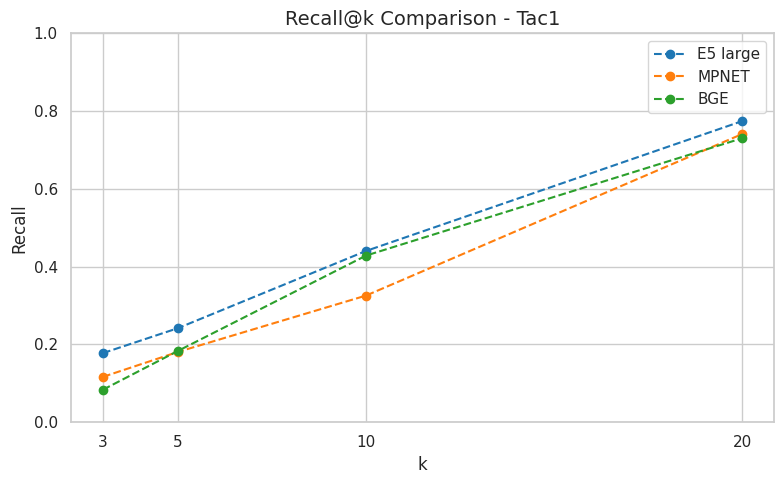

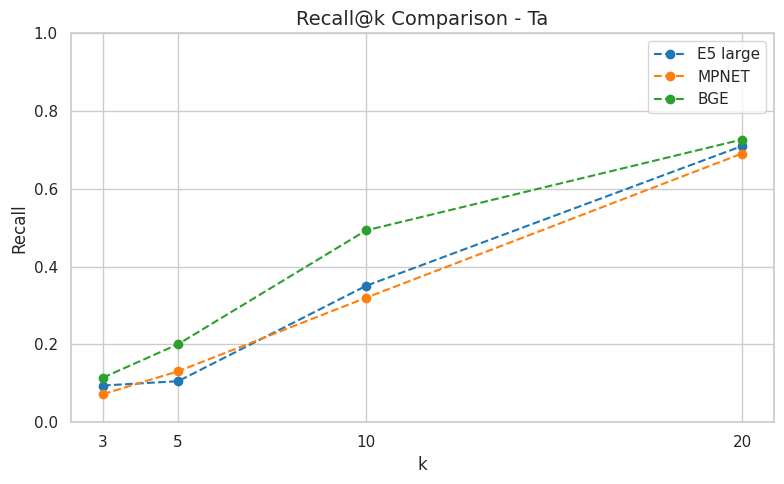

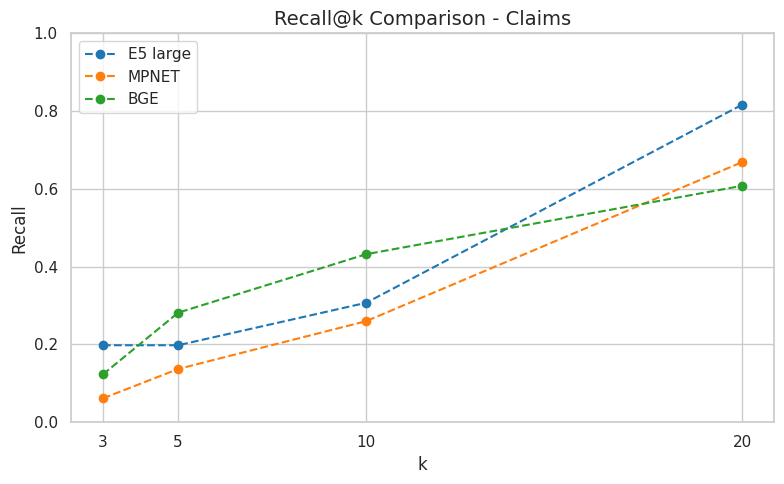

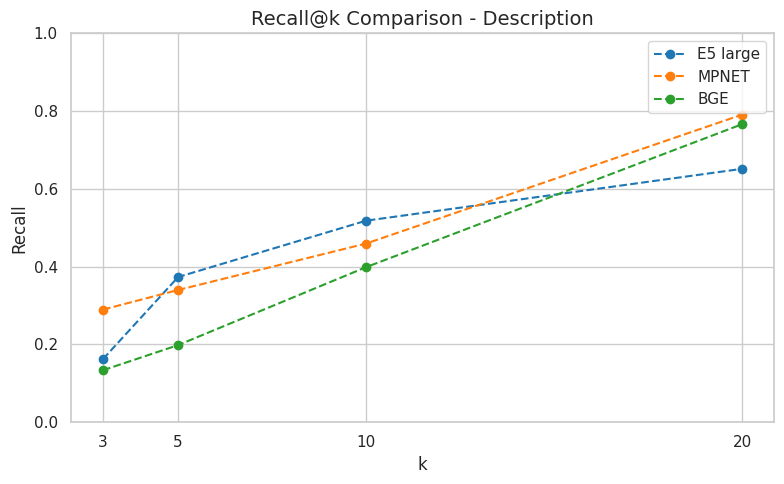

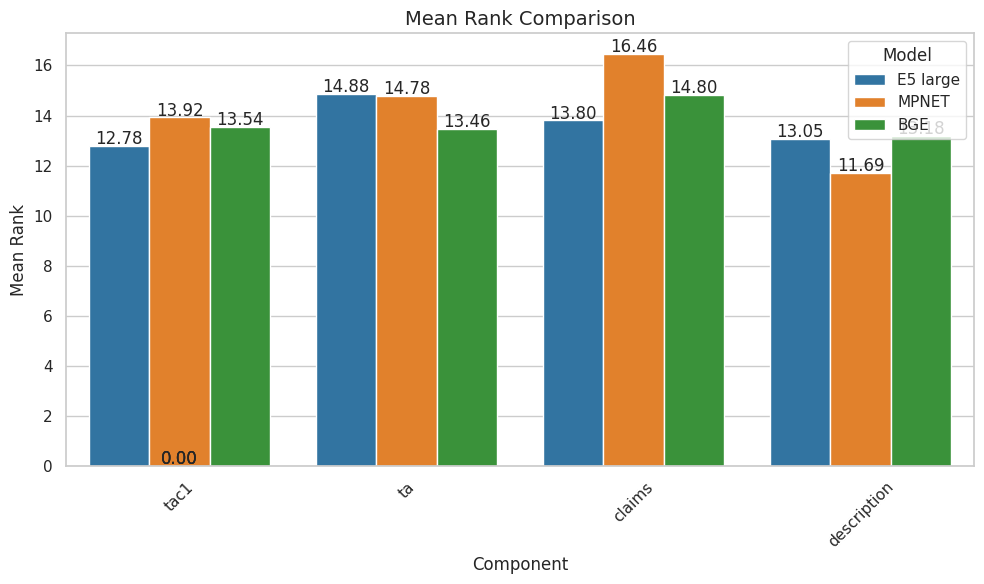

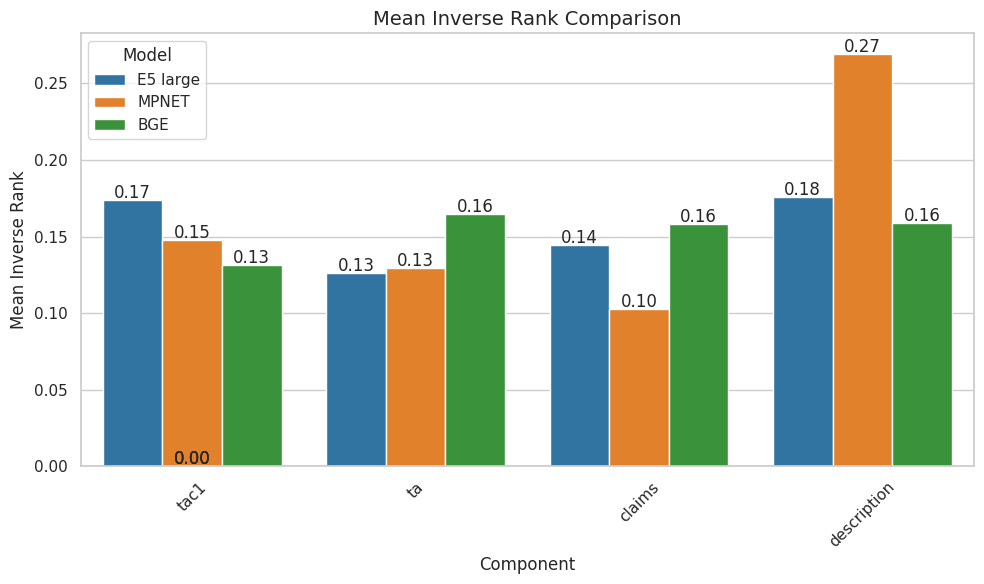

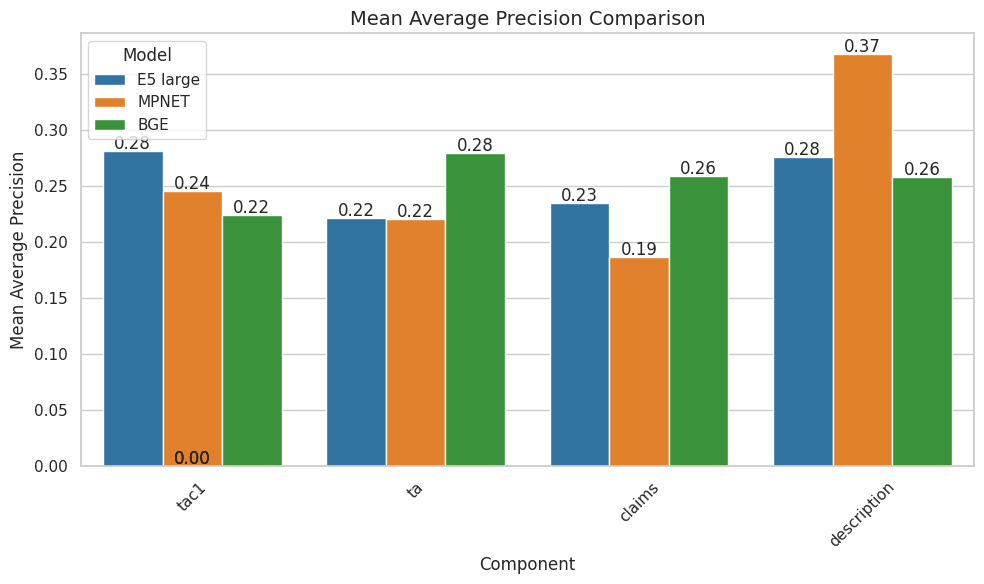

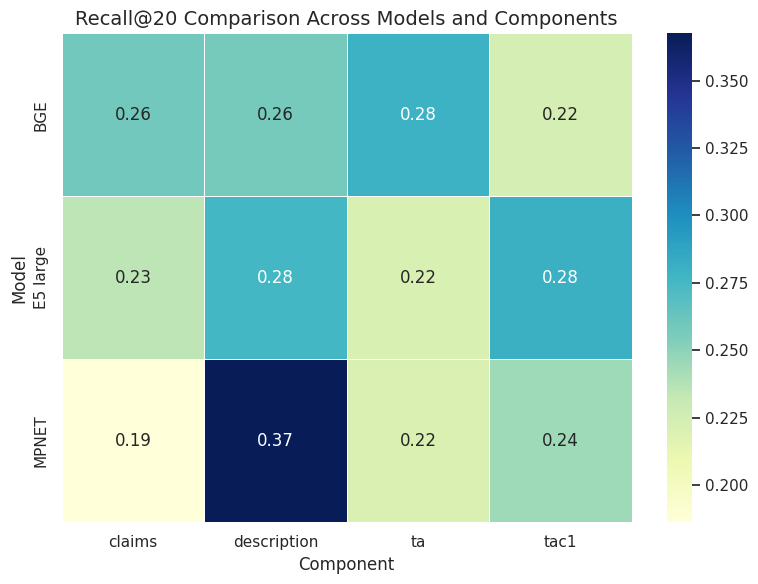

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = [
    # E5 Large
    {"Model": "E5 large", "Component": "tac1",
     "recall_at_3": 0.1778, "recall_at_5": 0.2421, "recall_at_10": 0.4405, "recall_at_20": 0.7742,
     "mean_rank": 12.7794, "mean_inv_rank": 0.1736, "mean_average_precision": 0.2808},

    {"Model": "E5 large", "Component": "ta",
     "recall_at_3": 0.0944, "recall_at_5": 0.1056, "recall_at_10": 0.3508, "recall_at_20": 0.7103,
     "mean_rank": 14.8786, "mean_inv_rank": 0.1260, "mean_average_precision": 0.2213},

    {"Model": "E5 large", "Component": "claims",
     "recall_at_3": 0.1980, "recall_at_5": 0.1980, "recall_at_10": 0.3071, "recall_at_20": 0.8163,
     "mean_rank": 13.8032, "mean_inv_rank": 0.1447, "mean_average_precision": 0.2345},

    {"Model": "E5 large", "Component": "description",
     "recall_at_3": 0.1623, "recall_at_5": 0.3734, "recall_at_10": 0.5183, "recall_at_20": 0.6516,
     "mean_rank": 13.0472, "mean_inv_rank": 0.1761, "mean_average_precision": 0.2758},

    # MPNET
    {"Model": "MPNET", "Component": "ta",
     "recall_at_3": 0.0722, "recall_at_5": 0.1310, "recall_at_10": 0.3202, "recall_at_20": 0.6909,
     "mean_rank": 14.7750, "mean_inv_rank": 0.1297, "mean_average_precision": 0.2205},

    {"Model": "MPNET", "Component": "description",
     "recall_at_3": 0.2897, "recall_at_5": 0.3401, "recall_at_10": 0.4595, "recall_at_20": 0.7909,
     "mean_rank": 11.6921, "mean_inv_rank": 0.2692, "mean_average_precision": 0.3675},

    {"Model": "MPNET", "Component": "tac1",
     "recall_at_3": 0.1167, "recall_at_5": 0.1810, "recall_at_10": 0.3258, "recall_at_20": 0.7409,
     "mean_rank": 13.9226, "mean_inv_rank": 0.1478, "mean_average_precision": 0.2450},

    {"Model": "MPNET", "Component": "claims",
     "recall_at_3": 0.0615, "recall_at_5": 0.1369, "recall_at_10": 0.2599, "recall_at_20": 0.6687,
     "mean_rank": 16.4587, "mean_inv_rank": 0.1024, "mean_average_precision": 0.1863},

    # BGE
    {"Model": "BGE", "Component": "description",
     "recall_at_3": 0.1337, "recall_at_5": 0.1984, "recall_at_10": 0.3988, "recall_at_20": 0.7663,
     "mean_rank": 13.1806, "mean_inv_rank": 0.1590, "mean_average_precision": 0.2577},

    {"Model": "BGE", "Component": "tac1",
     "recall_at_3": 0.0837, "recall_at_5": 0.1837, "recall_at_10": 0.4286, "recall_at_20": 0.7302,
     "mean_rank": 13.5444, "mean_inv_rank": 0.1313, "mean_average_precision": 0.2243},

    {"Model": "BGE", "Component": "claims",
     "recall_at_3": 0.1230, "recall_at_5": 0.2817, "recall_at_10": 0.4321, "recall_at_20": 0.6079,
     "mean_rank": 14.8040, "mean_inv_rank": 0.1580, "mean_average_precision": 0.2590},

    {"Model": "BGE", "Component": "ta",
     "recall_at_3": 0.1147, "recall_at_5": 0.2008, "recall_at_10": 0.4933, "recall_at_20": 0.7270,
     "mean_rank": 13.4619, "mean_inv_rank": 0.1645, "mean_average_precision": 0.2796},
]

df = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 100
colors = {'E5 large': '#1f77b4', 'MPNET': '#ff7f0e', 'BGE': '#2ca02c'}

# Recall@k Line Charts
components = df['Component'].unique()
k_values = [3, 5, 10, 20]

for component in components:
    plt.figure(figsize=(8, 5))
    component_df = df[df['Component'] == component]

    for model in df['Model'].unique():
        model_df = component_df[component_df['Model'] == model]
        recalls = [model_df[f'recall_at_{k}'].values[0] for k in k_values]
        plt.plot(k_values, recalls,
                 marker='o',
                 linestyle='--',
                 color=colors[model],
                 label=model)

    plt.title(f'Recall@k Comparison - {component.capitalize()}', fontsize=14)
    plt.xlabel('k', fontsize=12)
    plt.ylabel('Recall', fontsize=12)
    plt.xticks(k_values)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Bar Charts
metrics = ['mean_rank', 'mean_inv_rank', 'mean_average_precision']
metric_names = ['Mean Rank', 'Mean Inverse Rank', 'Mean Average Precision']

for metric, metric_name in zip(metrics, metric_names):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Component', y=metric, hue='Model', data=df, palette=colors)

    plt.title(f'{metric_name} Comparison', fontsize=14)
    plt.xlabel('Component', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Model')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Heatmap for Recall@20
heatmap_df = df.pivot(index='Model', columns='Component', values='mean_average_precision')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Recall@20 Comparison Across Models and Components', fontsize=14)
plt.xlabel('Component', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
# E5 LARGE tac1 + description

best_model_name = "intfloat/e5-large-v2"
best_text_type = "tac1,description"
max_length = 512

print("\nRunning reranking on the test set...")
!python cross_encoder_reranking_train.py \
    --model_name "{best_model_name}" \
    --text_type "{best_text_type}" \
    --pre_ranking "{shuffled_pre_ranking_file}" \
    --queries_list "{test_queries_file}" \
    --queries_content "{queries_content_file}" \
    --documents_content "{documents_content_file}" \
    --output "{test_predictions_file}" \
    --max_length {max_length}

print(f"\nTest set predictions saved to: {test_predictions_file}")


Running reranking on the test set...
Loading training queries from test_queries.json...
Loaded 10 training queries
Loading pre-ranking data from shuffled_pre_ranking.json...
Filtered pre-ranking to 10 training queries
Loading query content from queries_content_with_features.json...
Loading document content from documents_content_with_features.json...
Loading model intfloat/e5-large-v2...
2025-04-09 10:03:36.086950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744193016.132421   15451 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744193016.142941   15451 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 10:03:36.178651: I tensorflow/core

In [ ]:
# GEMINI TRY

import time
import os
import json
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from google import genai

# Replace with your actual Gemini API key
GEMINI_API_KEY = "ton api"

# Initialize Gemini Client
client = genai.Client(api_key=GEMINI_API_KEY)
embedding_model_name = "gemini-embedding-exp-03-07"

# Define the paths to your data files
train_queries_file = "train_queries.json"
test_queries_file = "test_queries.json"
train_gold_mapping_file = "train_gold_mapping.json"
shuffled_pre_ranking_file = "shuffled_pre_ranking.json"
queries_content_file = "queries_content_with_features.json"
documents_content_file = "documents_content_with_features.json"

# Define the output file for test predictions
test_predictions_file = "predictions_gemini_exp.json"

# Check if necessary data files exist
if not all(os.path.exists(f) for f in [test_queries_file, shuffled_pre_ranking_file, queries_content_file, documents_content_file]):
    print("Error: One or more necessary data files for the test set are missing.")
    exit()
else:
    print("Necessary data files for the test set found.")

def load_json_file(file_path):
    """Load JSON data from a file"""
    with open(file_path, 'r') as f:
        return json.load(f)

def save_json_file(data, file_path):
    """Save data to a JSON file"""
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=2)

def load_content_data(file_path):
    """Load content data from a JSON file"""
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Create a dictionary mapping FAN to Content
    content_dict = {item['FAN']: item['Content'] for item in data}
    return content_dict

def extract_text(content_dict, text_type="full"):
    """Extract text from patent content based on text_type"""
    if text_type == "TA" or text_type == "title_abstract":
        title = content_dict.get("title", "")
        abstract = content_dict.get("pa01", "")
        return f"{title} {abstract}".strip()
    elif text_type == "claims":
        claims = " ".join([v for k, v in content_dict.items() if k.startswith('c-')])
        return claims.strip()
    elif text_type == "description":
        description = " ".join([v for k, v in content_dict.items() if k.startswith('p')])
        return description.strip()
    elif text_type == "full":
        all_text = []
        if "title" in content_dict:
            all_text.append(content_dict["title"])
        if "pa01" in content_dict:
            all_text.append(content_dict["pa01"])
        for key, value in content_dict.items():
            if key not in ["title", "pa01"]:
                all_text.append(value)
        return " ".join(all_text).strip()
    elif text_type == "tac1":
        title = content_dict.get("title", "")
        abstract = content_dict.get("pa01", "")
        first_claim = next((v for k, v in content_dict.items() if k.startswith('c-')), "")
        return f"{title} {abstract} {first_claim}".strip()
    return ""

def get_embedding_gemini(text_list, batch_size=1):  # Adjust batch_size
    """Get embeddings for a list of texts using the specified Gemini embedding model with batching."""
    embeddings = []
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i + batch_size]
        try:
            result = client.models.embed_content(
                model=embedding_model_name,
                contents=batch,  # Send a list of texts
            )
            if result.embeddings:
                for embedding in result.embeddings:
                    embeddings.append(embedding.values)
            else:
                print(f"Warning: No embeddings returned for the batch starting at index {i}")
                return None
            time.sleep(1)  # Add a small delay to avoid rate limits
        except Exception as e:
            print(f"Error getting Gemini embeddings for batch starting at index {i}: {e}")
            return None
    return embeddings

# Load test queries and pre-ranking
test_queries = load_json_file(test_queries_file)
print(f"Loaded {len(test_queries)} test queries.")
pre_ranking_test = load_json_file(shuffled_pre_ranking_file)
pre_ranking_test_filtered = {fan: docs for fan, docs in pre_ranking_test.items() if fan in test_queries}
print(f"Filtered pre-ranking to {len(pre_ranking_test_filtered)} test queries.")

# Load content data
queries_content = load_content_data(queries_content_file)
documents_content = load_content_data(documents_content_file)

# Rerank using Gemini embeddings
re_ranked_predictions = {}
best_text_type = "claims"  # You can experiment with other text types

print("\nStarting reranking process for test queries using Gemini Embedding Model...")
for query_fan, pre_ranked_docs in tqdm(pre_ranking_test_filtered.items(), desc="Processing queries"):
    if query_fan not in queries_content:
        print(f"Warning: Query FAN {query_fan} not found in content.")
        re_ranked_predictions[query_fan] = pre_ranked_docs  # Keep original ranking
        continue

    query_text = extract_text(queries_content[query_fan], best_text_type)
    doc_texts = []
    doc_fans = []
    for doc_fan in pre_ranked_docs:
        if doc_fan in documents_content:
            doc_texts.append(extract_text(documents_content[doc_fan], best_text_type))
            doc_fans.append(doc_fan)
        else:
            print(f"Warning: Document FAN {doc_fan} not found in content.")

    if not doc_texts:
        re_ranked_predictions[query_fan] = []
        continue

    all_texts = [query_text] + doc_texts
    embeddings = get_embedding_gemini(all_texts)

    if embeddings and len(embeddings) == len(all_texts):
        query_embedding = embeddings[0]
        doc_embeddings = embeddings[1:]
        similarity_scores = cosine_similarity([query_embedding], doc_embeddings)[0]
        ranked_indices = np.argsort(similarity_scores)[::-1]
        re_ranked_predictions[query_fan] = [doc_fans[i] for i in ranked_indices]
    else:
        print(f"Warning: Could not get embeddings for query {query_fan}. Keeping original ranking.")
        re_ranked_predictions[query_fan] = pre_ranked_docs

# Save the re-ranked predictions
save_json_file(re_ranked_predictions, test_predictions_file)
print(f"\nTest set predictions saved to: {test_predictions_file}")


Necessary data files for the test set found.
Loaded 10 test queries.
Filtered pre-ranking to 10 test queries.

Starting reranking process for test queries using Gemini Embedding Model...


Processing queries:  10%|█         | 1/10 [00:12<01:53, 12.65s/it]

Error getting Gemini embeddings for batch starting at index 6: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}


Processing queries:  40%|████      | 4/10 [00:13<00:12,  2.04s/it]

Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}


Processing queries:  60%|██████    | 6/10 [00:13<00:04,  1.11s/it]

Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}


Processing queries: 100%|██████████| 10/10 [00:13<00:00,  1.35s/it]

Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error getting Gemini embeddings for batch starting at index 0: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}

Test set predictions saved to: predictions_gemini_exp.json

Remember to download '{test_predictions_file}' and submit it to Codabench.


In [ ]:
!pip install fuzzywuzzy
import os
import json
import math
from collections import Counter
from fuzzywuzzy import fuzz  # pip install fuzzywuzzy
from nltk.corpus import wordnet  # pip install nltk (and download wordnet data: import nltk; nltk.download('wordnet'))

# PATHS
train_queries_file = "train_queries.json"
test_queries_file = "test_queries.json"
train_gold_mapping_file = "train_gold_mapping.json"
shuffled_pre_ranking_file = "shuffled_pre_ranking.json"
queries_content_file = "queries_content_with_features.json"
documents_content_file = "documents_content_with_features.json"
test_predictions_file = "creative_predictions.json"

def load_json_file(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

if not all(os.path.exists(f) for f in [test_queries_file, shuffled_pre_ranking_file, queries_content_file, documents_content_file, train_gold_mapping_file, queries_content_file, documents_content_file, train_queries_file]):
    print("Error: One or more necessary data files are missing.")
    exit()
else:
    print("Necessary data files found.")

test_queries = load_json_file(test_queries_file)
pre_ranking_test = load_json_file(shuffled_pre_ranking_file)
pre_ranking_test_filtered = {fan: docs for fan, docs in pre_ranking_test.items() if fan in test_queries}
train_gold_mapping = load_json_file(train_gold_mapping_file)
train_queries = load_json_file(train_queries_file)

# --- Load and Transform queries_content ---
queries_content_list = load_json_file(queries_content_file)
queries_content = {}
for item in queries_content_list:
    patent_id = item.get("patent_id")
    if patent_id:
        queries_content[patent_id] = item
print(f"Loaded and processed {len(queries_content)} query content items.")

# --- Load and Transform documents_content ---
documents_content_list = load_json_file(documents_content_file)
documents_content = {}
for item in documents_content_list:
    patent_id = item.get("patent_id")
    if patent_id:
        documents_content[patent_id] = item
print(f"Loaded and processed {len(documents_content)} document content items.")

queries_content_train = {k: v for k, v in queries_content.items() if k in train_queries}
documents_content_train = documents_content

def prepare_feature_weights_tfidf(train_gold_mapping, queries_content, documents_content):
    doc_feature_counts = {}
    all_docs = {**queries_content, **documents_content}
    total_num_docs = len(all_docs)

    for doc_id, content in all_docs.items():
        features = content.get('features', [])
        doc_feature_counts[doc_id] = Counter(features)

    feature_doc_frequency = Counter()
    for doc_id, counts in doc_feature_counts.items():
        for feature in counts:
            feature_doc_frequency[feature] += 1

    feature_weights_tfidf = {}
    for doc_id, counts in doc_feature_counts.items():
        for feature, count in counts.items():
            tf = count / (sum(counts.values()) + 1e-6)
            idf = math.log(total_num_docs / (feature_doc_frequency[feature] + 1) + 1e-6)
            feature_weights_tfidf[feature] = feature_weights_tfidf.get(feature, 0) + tf * idf

    return dict(feature_weights_tfidf)

def calculate_feature_similarity_improved(query_features, doc_features, feature_weights_tfidf=None):
    score = 0

    # 1. TF-IDF Weighted Overlap
    if feature_weights_tfidf:
        common_features = set(query_features) & set(doc_features)
        for feature in common_features:
            score += feature_weights_tfidf.get(feature, 0)

    # 2. Fuzzy Matching
    fuzzy_score = 0
    for q_feature in query_features:
        for d_feature in doc_features:
            ratio = fuzz.ratio(q_feature, d_feature)
            if ratio > 85:  # Increased threshold
                fuzzy_score += ratio / 100.0 * 0.2  # Reduced weight

    score += fuzzy_score

    # 3. N-gram Overlap (bi-grams)
    def get_ngrams(text, n):
        n_grams = set()
        words = text.split()
        for i in range(len(words) - n + 1):
            n_grams.add(" ".join(words[i:i+n]))
        return n_grams

    ngram_overlap_score = 0
    for q_feature in query_features:
        for d_feature in doc_features:
            q_2grams = get_ngrams(q_feature, 2)
            d_2grams = get_ngrams(d_feature, 2)
            overlap = len(q_2grams & d_2grams)
            union = len(q_2grams | d_2grams)
            if union > 0:
                ngram_overlap_score += overlap / union * 0.1  # Jaccard-like

    score += ngram_overlap_score

    return score

def creative_reranking(pre_ranking, queries_content, documents_content, feature_weights_tfidf=None):
    ranked_results = {}
    for query_id, initial_ranking in pre_ranking.items():
        if query_id in queries_content:
            query_features = queries_content[query_id].get('features', [])
            scored_documents = []
            for doc_id in initial_ranking:
                if doc_id in documents_content:
                    doc_features = documents_content[doc_id].get('features', [])
                    similarity_score = calculate_feature_similarity_improved(
                        query_features,
                        doc_features,
                        feature_weights_tfidf=feature_weights_tfidf
                    )
                    scored_documents.append((doc_id, similarity_score))
            scored_documents.sort(key=lambda item: item[1], reverse=True)
            ranked_results[query_id] = [doc_id for doc_id, score in scored_documents]
        else:
            ranked_results[query_id] = initial_ranking
    return ranked_results

# --- Prepare Feature Weights using TF-IDF ---
feature_weights_tfidf = prepare_feature_weights_tfidf(train_gold_mapping, queries_content_train, documents_content_train)

# --- Perform Creative Reranking on Test Set ---
reranked_predictions = creative_reranking(
    pre_ranking_test_filtered,
    queries_content,
    documents_content,
    feature_weights_tfidf=feature_weights_tfidf
)

# --- Save Predictions ---
with open(test_predictions_file, 'w') as f:
    json.dump(reranked_predictions, f, indent=4)

print(f"\nCreative test set predictions saved to: {test_predictions_file}")

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Necessary data files found.
Loaded and processed 0 query content items.
Loaded and processed 0 document content items.

Creative test set predictions saved to: creative_predictions.json
